## **Network Intrusion Detection Engine**


Mounted at /content/drive


Importing libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from joblib import dump
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

Data Loading

In [2]:
data_path = "Data-Small/"

In [3]:
data_train = pd.read_csv(data_path+"UNSW_NB15_training-set.csv",index_col="id")
data_test = pd.read_csv(data_path+"UNSW_NB15_testing-set.csv",index_col="id")

Training data Description

In [4]:
data_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
data_train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 1 to 82332
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

Checking for Null values

In [7]:
#plt.figure(figsize=(10,10))
#sns.heatmap(data_train.isnull(),cmap='Blues')

Remove Duplicacy from training data

In [8]:
data_train.duplicated().value_counts()

False    55945
True     26387
dtype: int64

In [9]:
data_train.drop_duplicates(inplace=True)

In [10]:
data_train.shape

(55945, 44)

Corellation matrix of features

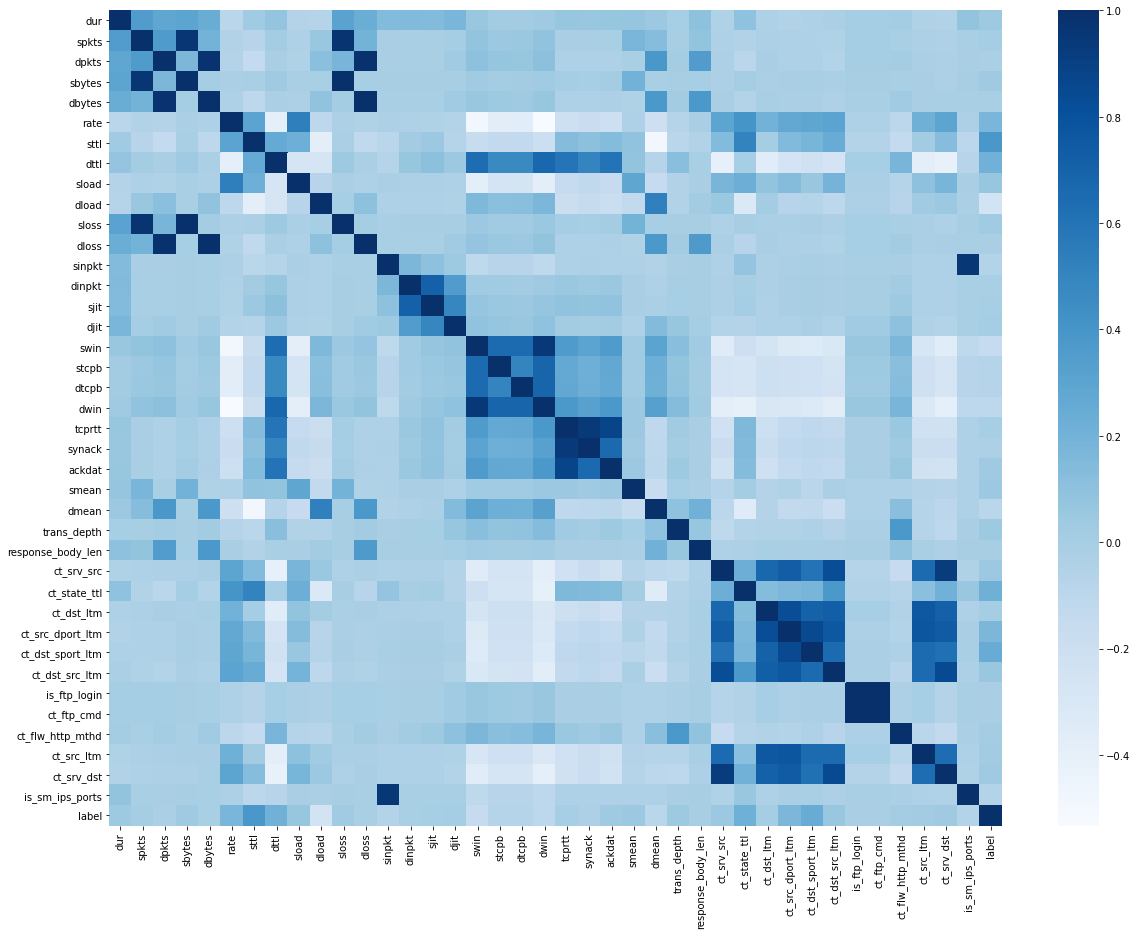

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr(),cmap='Blues')

Test data Description

In [12]:
data_test.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 1 to 175341
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [14]:
data_test.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


Checking for Null values

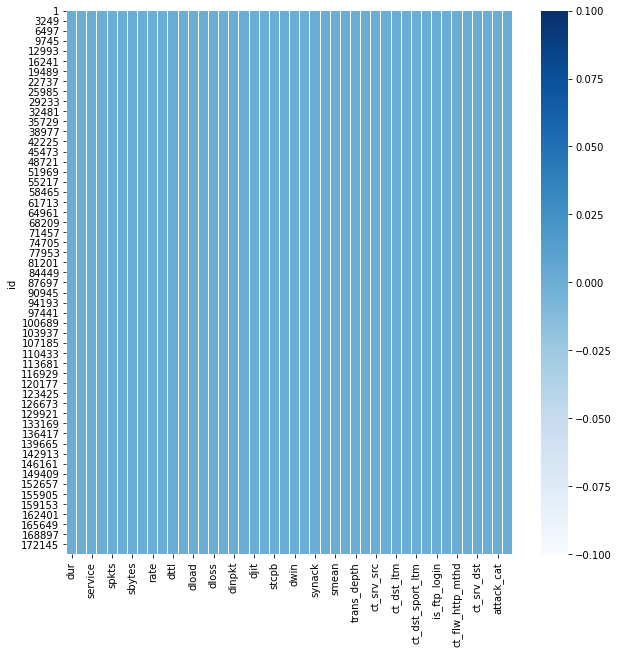

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_test.isnull(),cmap='Blues')

Remove Duplicacy from testing data

Text(0.5, 0, 'Is it duplicate?')

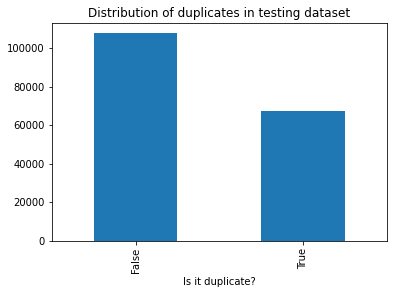

In [ ]:
data_test.duplicated().value_counts().plot(kind="bar")
plt.title("Distribution of duplicates in testing dataset")
plt.xlabel("Is it duplicate?")

In [ ]:
data_test.drop_duplicates(inplace=True)

In [ ]:
data_test.shape

(107740, 44)

Coorelation of the features

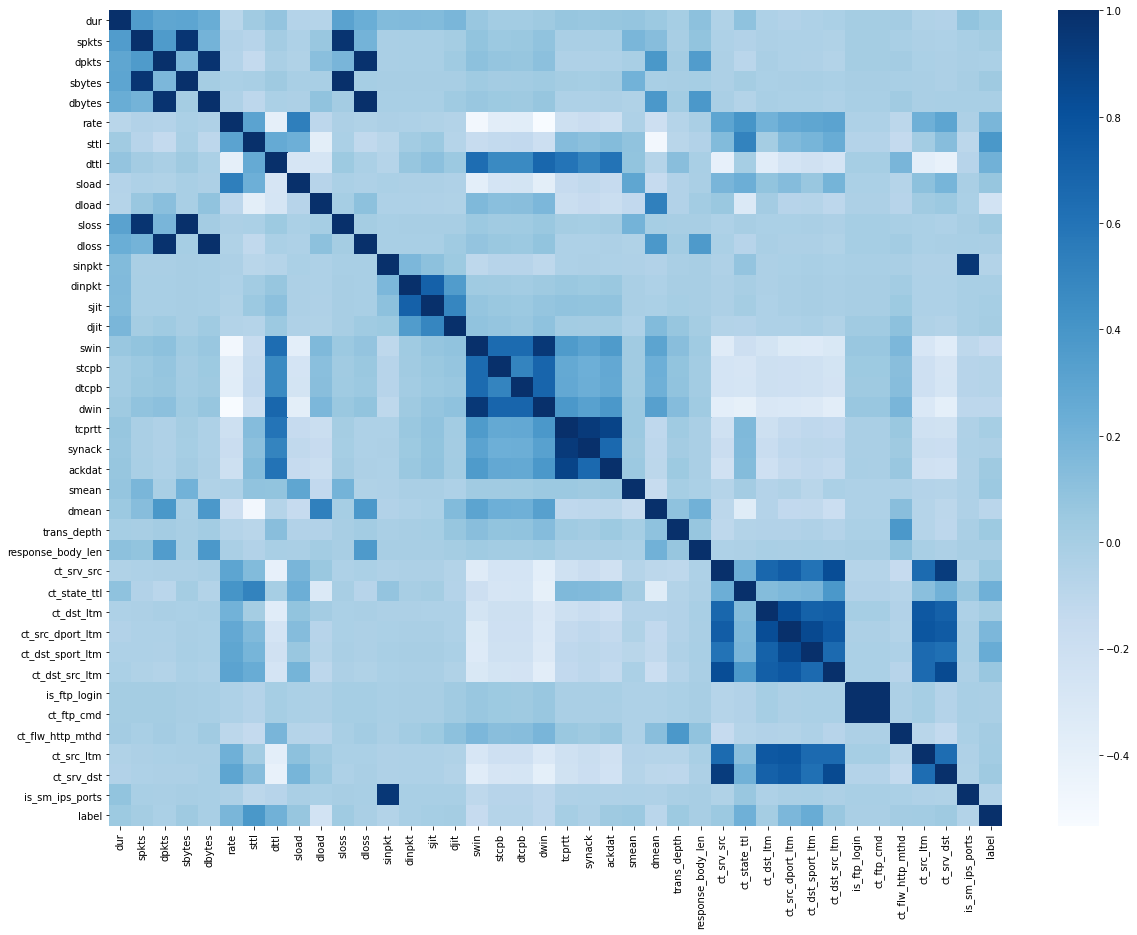

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr(),cmap='Blues')

Saving maximum entry of traing data to scale the test and train data


In [ ]:
dict_max ={}
data_train.max()

dur                           60
proto                       zero
service                      ssl
state                        RST
spkts                      10646
dpkts                      11018
sbytes                  14355774
dbytes                  14657531
rate                       1e+06
sttl                         255
dttl                         253
sload                  5.268e+09
dload                2.08211e+07
sloss                       5319
dloss                       5507
sinpkt                     60010
dinpkt                   57739.2
sjit                 1.48383e+06
djit                      463199
swin                         255
stcpb                 4294949667
dtcpb                 4294880717
dwin                         255
tcprtt                   3.82147
synack                   3.22679
ackdat                   2.92878
smean                       1504
dmean                       1500
trans_depth                  131
response_body_len        5242880
ct_srv_src

Scale the paraments with maximum value in training set

In [ ]:
for column_name in data_train.columns.values:
  if data_train[column_name].dtype != "object" and column_name!="label":
    max = data_train[column_name].max()
    data_train[column_name] = data_train[column_name]/max
    dict_max[column_name] = max

Dictionary of maximum values 

In [ ]:
dict_max

{'ackdat': 2.928778,
 'ct_dst_ltm': 59,
 'ct_dst_sport_ltm': 38,
 'ct_dst_src_ltm': 63,
 'ct_flw_http_mthd': 16,
 'ct_ftp_cmd': 2,
 'ct_src_dport_ltm': 59,
 'ct_src_ltm': 60,
 'ct_srv_dst': 62,
 'ct_srv_src': 63,
 'ct_state_ttl': 6,
 'dbytes': 14657531,
 'dinpkt': 57739.24,
 'djit': 463199.2401,
 'dload': 20821108.0,
 'dloss': 5507,
 'dmean': 1500,
 'dpkts': 11018,
 'dtcpb': 4294880717,
 'dttl': 253,
 'dur': 59.999989,
 'dwin': 255,
 'is_ftp_login': 2,
 'is_sm_ips_ports': 1,
 'rate': 1000000.003,
 'response_body_len': 5242880,
 'sbytes': 14355774,
 'sinpkt': 60009.992,
 'sjit': 1483830.917,
 'sload': 5268000256.0,
 'sloss': 5319,
 'smean': 1504,
 'spkts': 10646,
 'stcpb': 4294949667,
 'sttl': 255,
 'swin': 255,
 'synack': 3.226788,
 'tcprtt': 3.8214650000000003,
 'trans_depth': 131}

Saving the max value object

In [ ]:
dump(dict_max, data_path+'Max-value-dict.joblib') 

['/content/drive/My Drive/NCIIPC/Data-Small/Max-value-dict.joblib']

Scale the paraments with maximum value in testing set

In [ ]:
for column_name in data_test.columns.values:
  if data_test[column_name].dtype != "object" and column_name!="label":
    max = dict_max[column_name]
    data_test[column_name] =data_test[column_name]/max

In [ ]:
obj_col = ["proto","service","state","attack_cat"]
print("Training Data",end="\n\n")
for col in obj_col:
    print("The {} column has these {} features {}".format(col,len(data_train[col].unique()),data_train[col].unique()),end="\n\n")
print("Testing Data",end="\n\n")
for col in obj_col:
    print("The {} column has these {} features {}".format(col,len(data_test[col].unique()),data_test[col].unique()),end="\n\n")

Training Data

The proto column has these 131 features ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'


In [ ]:
def get_unique_features(column_name):
  train_col = set(data_train[column_name].unique())
  test_col = set(data_test[column_name].unique())
  return (test_col-train_col ,train_col-test_col)

In [ ]:
print("Unique features in proto colun is : {}".format(get_unique_features("proto")))
print("Unique features in state colun is : {}".format(get_unique_features("state")))

Unique features in proto colun is : ({'icmp', 'rtp'}, set())
Unique features in state colun is : ({'ECO', 'no', 'URN', 'PAR'}, {'CLO', 'ACC'})


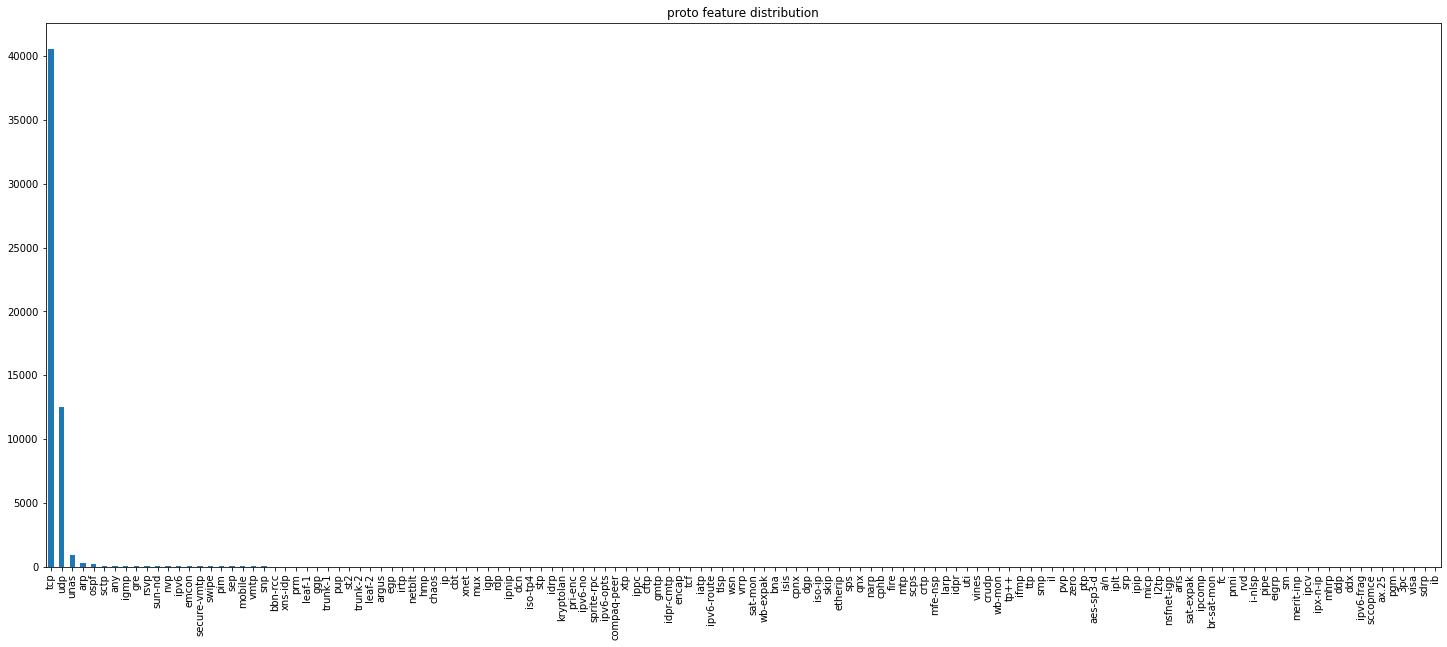

In [ ]:
data_train.proto.value_counts().plot(kind='bar', title ="proto feature distribution",figsize=(25, 10))

In [ ]:
label_encoder = LabelEncoder() 
data_train['proto']= label_encoder.fit_transform(data_train['proto']) 
data_test['proto']= label_encoder.fit_transform(data_test['proto']) 

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode,cdrop=[]):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.drop([feature_to_encode], axis=1,inplace=True)
    if cdrop:
      for col in cdrop:
        try:
          res = res.drop([feature_to_encode+"_"+col], axis=1)
        except:
          pass
    return res

In [ ]:
features_to_encode = ['service', 'state']
for feature in features_to_encode:
    data_train = encode_and_bind(data_train, feature,['CLO','ACC'])
    data_test = encode_and_bind(data_test,feature ,['icmp', 'rtp','no', 'PAR', 'URN', 'ECO'])

In [ ]:
data_train.drop(["service_-"],axis=1,inplace=True)
data_test.drop(["service_-"],axis=1,inplace=True)

In [ ]:
#Y2_train = data_train['attack_cat'] = label_encoder1.fit_transform(data_train['attack_cat'])
#Y2_test = data_test['attack_cat'] = label_encoder1.fit_transform(data_test['attack_cat'])
data_train_old = data_train.copy()
data_test_old = data_test.copy()
#attack_cat = label_encoder.classes_
Y1_train = data_train['label']
Y1_test = data_test['label']
data_train.drop(["attack_cat","label"],axis=1,inplace=True)
data_test.drop(["attack_cat","label"],axis=1,inplace=True)

In [ ]:
Y1_train.unique()

array([0, 1])

Text(0.5, 0, 'Class Indexes')

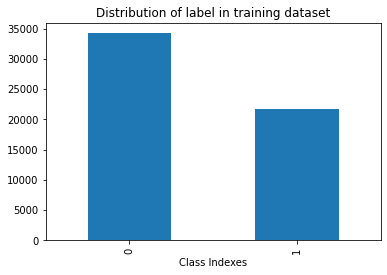

In [ ]:
Y1_train.value_counts().plot(kind="bar")
plt.title("Distribution of label in training dataset")
plt.xlabel("Class Indexes")

Binary Classification

Text(0.5, 0, 'Class Indexes')

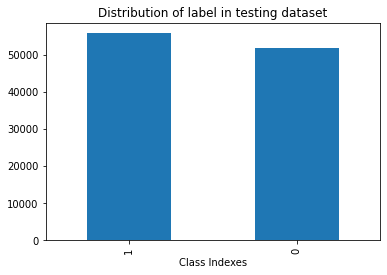

In [ ]:
Y1_test.value_counts().plot(kind="bar")
plt.title("Distribution of label in testing dataset")
plt.xlabel("Class Indexes")

In [ ]:
d = pd.concat([data_train , data_test])
y = pd.concat([Y1_train , Y1_test])

Train the binary classifier with data_train

Uncomment the classifier you want to select

In [ ]:
#clf = SVC(kernel='rbf', C=1, gamma='auto')
clf = RandomForestClassifier(random_state=42,n_estimators=1000, n_jobs=-1,oob_score=True,min_samples_leaf=4)
#clf = LogisticRegression(solver='lbfgs',random_state=42,max_iter=1500)
#clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(data_train,Y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
cvb = sum(cross_val_score(clf,d,y))/5
print("The Average score of model on 5 - fold cross vadition is : {}".format(cvb))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Average score of model on 5 - fold cross vadition is : 0.8288114366007882


In [ ]:
features = data_train.columns
importances = clf.feature_importances_ 
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

"\nfeatures = data_train.columns\nimportances = clf.feature_importances_ \nindices = np.argsort(importances)\nplt.figure(figsize=(10,15))\nplt.title('Feature Importances')\nplt.barh(range(len(indices)), importances[indices], color='b', align='center')\nplt.yticks(range(len(indices)), [features[i] for i in indices])\nplt.xlabel('Relative Importance')\nplt.show()\n"

In [ ]:
dump(clf, data_path+'Binary-clf.joblib') 

['/content/drive/My Drive/NCIIPC/Data-Small/Binary-clf.joblib']

Predict through binary classification on data_test

In [ ]:
Y1_test_pred = clf.predict(data_test)

Prediction per sample

In [ ]:
%%timeit
clf.predict(data_test.head(1))

1000 loops, best of 3: 623 µs per loop


Calculation of Accuracy

In [ ]:
score = accuracy_score(Y1_test, Y1_test_pred)
pres = precision_score(Y1_test, Y1_test_pred, average='binary')
print("Accuracy of Binary Classifier is : {}% and precision is {}".format(round(score*100,2),pres))

Accuracy of Binary Classifier is : 78.78% and precision is 0.9521081199627173


Get **attack_cat** and **label_pre** feature back to combine with test data

In [ ]:
data_test["label_pre"] = Y1_test_pred   # 0 or 1
data_test["attack_cat"] = data_test_old["attack_cat"].values    # all attack classes

Removal of all normal predicted traffic [Which may contain some false positives]

In [ ]:
data_test = data_test[data_test.label_pre==1]

Plotting to see distribution of class


Text(0.5, 0, 'Attacks')

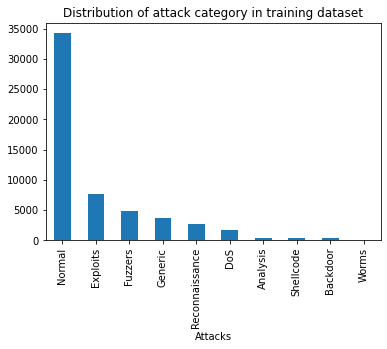

In [ ]:
data_train_old.attack_cat.value_counts().plot(kind="bar")
plt.title("Distribution of attack category in training dataset")
plt.xlabel("Attacks")

Text(0.5, 0, 'Attacks')

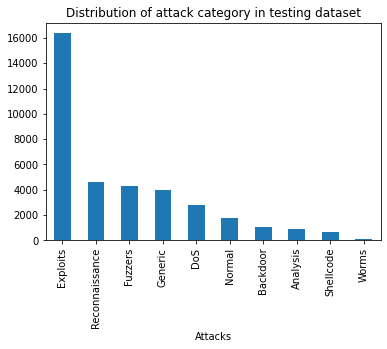

In [ ]:
data_test.attack_cat.value_counts().plot(kind="bar")
plt.title("Distribution of attack category in testing dataset")
plt.xlabel("Attacks")

In [ ]:
data_test.attack_cat.value_counts()

Exploits          16363
Reconnaissance     4625
Fuzzers            4301
Generic            3951
DoS                2769
Normal             1747
Backdoor           1028
Analysis            913
Shellcode           673
Worms               108
Name: attack_cat, dtype: int64

Removal of normal traffic from test data 

In [ ]:
#data_test = data_test[data_test.attack_cat!="Normal"]

Encoding classes with label encoders

In [ ]:
label_encoder = LabelEncoder()
Y2_test = data_test['attack_cat'] = label_encoder.fit_transform(data_test['attack_cat'])

Plotting to see distribution of class in numeric

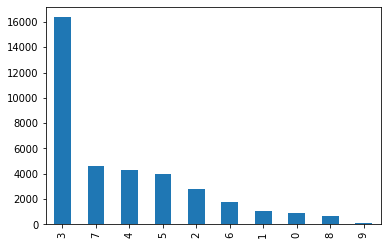

In [ ]:
data_test.attack_cat.value_counts().plot(kind="bar")

In [ ]:
data_test.attack_cat.value_counts()

3    16363
7     4625
4     4301
5     3951
2     2769
6     1747
1     1028
0      913
8      673
9      108
Name: attack_cat, dtype: int64

Multiclass Classification


Removal of Normal traffic from training data

In [ ]:
#data_train_old = data_train_old[data_train_old.attack_cat!="Normal"]

Encoding classes with label encoders

In [ ]:
label_encoder = LabelEncoder()
Y2_train = data_train_old['attack_cat'] = label_encoder.fit_transform(data_train_old['attack_cat'])

Removing **attack_cat**, **label** from traing data [data_train_old] and **attack_cat**, **label_pre** from testing dataset [data_test]

In [ ]:
data_train_old.drop(["attack_cat","label"],axis=1,inplace=True)
data_test.drop(["attack_cat","label_pre"],axis=1,inplace=True)

In [ ]:
d = pd.concat([data_train_old , data_test])
y = pd.concat([pd.Series(Y2_train) , pd.Series(Y2_test)])

Train the multi class classifier with data_train_old and select the classifier by uncommenting them

In [ ]:
mclf = RandomForestClassifier(random_state=42,n_estimators=1000, n_jobs=-1,oob_score=True,min_samples_leaf=2)
#mclf = tree.DecisionTreeClassifier(random_state=42)
#mclf = SVC(kernel='rbf', C=5, gamma='auto')
#mclf = LogisticRegression(solver='lbfgs',random_state=42,max_iter=1500)
mclf.fit(data_train_old, Y2_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
cvm = sum(cross_val_score(mclf,d,y))/5
print("The Average score of model on 5 - fold cross vadition is : {}".format(cvm))

In [ ]:
features = data_train_old.columns
importances = mclf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
dump(mclf, data_path+'Multi-clf.joblib') 

Predict through multi class classification on filtered data_test

In [ ]:
Y2_test_pred = mclf.predict(data_test)

Prediction per class

In [ ]:
%%timeit
mclf.predict(data_test.head(1))

Distribution of predicted classes

In [ ]:

pd.DataFrame(Y2_test_pred).value_counts()

Calculation of Accuracy

In [ ]:
score = accuracy_score(Y2_test, Y2_test_pred)
print("Accuracy of Multiclass Classifier is : {}%".format(round(score*100,2)))

Calculation of Other Parameters

In [ ]:
confm = confusion_matrix(Y2_test, Y2_test_pred)
df_cm = pd.DataFrame(confm, index=label_encoder.classes_, columns=label_encoder.classes_)
plt.figure(figsize=(15,12),facecolor="white")
ax = sns.heatmap(df_cm, cmap='Blues', annot=True)

In [ ]:
print(classification_report(Y2_test, Y2_test_pred, target_names=label_encoder.classes_))